<a href="https://colab.research.google.com/github/jhbellingrath/CS-290-Classwork/blob/main/notebooks/synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
np.random.seed(17)

In [ ]:
X = pd.DataFrame( {"x1": np.random.randn( 200 ), "x2": 2*np.random.randn( 200) - 5, "x3": np.random.randint(3, size=200) } )

In [ ]:
df=X
X

,x1,x2,x3
0,0.276266,-1.790080,2
1,-1.854628,-2.802276,2
2,0.623901,-8.206350,1
3,1.145311,-6.642125,0
4,1.037190,-3.882229,1
...,...,...,...
195,2.052304,-3.812932,2
196,1.145372,-5.475068,1
197,0.076480,-4.829170,0
198,-0.860655,-4.465796,1


In [ ]:
X["target"] = (X["x1"] > -2)*(X["x2"] > -7 )*(X["x3"]!=1)*1

In [ ]:
X

,x1,x2,x3,target
0,0.276266,-1.790080,2,1
1,-1.854628,-2.802276,2,1
2,0.623901,-8.206350,1,0
3,1.145311,-6.642125,0,1
4,1.037190,-3.882229,1,0
...,...,...,...,...
195,2.052304,-3.812932,2,1
196,1.145372,-5.475068,1,0
197,0.076480,-4.829170,0,1
198,-0.860655,-4.465796,1,0


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>],
       [<Axes: title={'center': 'x3'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

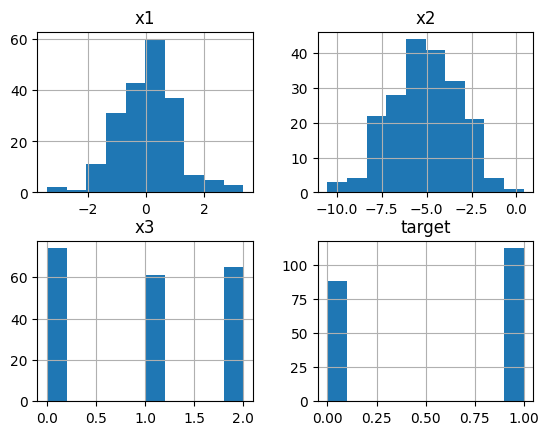

In [ ]:
X.hist()

In [ ]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB

In [ ]:
cnb = CategoricalNB().fit( np.array( X[["x3"]] ).reshape(-1,1), np.array( X["target"] ).reshape(-1,1) )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cnb.predict( np.array([0,1,2] ).reshape(-1,1) )

array([1, 0, 1])

In [ ]:
gnb = GaussianNB().fit( np.array( X[["x1","x2"]] ), np.array( X["target"] ).reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gnb.predict( np.array( pd.DataFrame( {"x1": [-3,-1.1], "x2": [-9,-3] } ) ) )

array([0, 1])

In [ ]:
attributes=df.columns[ df.columns !="target"]
attributes=attributes.tolist() ##converts the dataframe of of attributes to a list because it is easier to work with

In [ ]:
vals=df['target'].unique()
vals=vals.tolist() ##vals stores all of the unque values of the target value
gaussian_matrix=[] ##This will be a three dimensional matrix that stores the gaussian distributions of each attribute and each value of the target variable
for val in vals:
  restricted_attributes=df[df['target']==val]
  temp_matrix=[] ##stores all the guassian distributions for a specified target ariable value
  for attribute in attributes:
    mean=restricted_attributes[attribute].mean()
    std=restricted_attributes[attribute].std()
    temp_matrix.append([mean,std])
  gaussian_matrix.append(temp_matrix)

In [ ]:
def likelihood(target_value,attribute,attribute_value):
  i_target=vals.index(target_value)
  i_attribute=attributes.index(attribute)  ##these 2 lines detemine where in the matrix the values we are looking for are
  z_score=(gaussian_matrix[i_target][i_attribute][0]-attribute_value)/(gaussian_matrix[i_target][i_attribute][1])
  temp=stats.norm.pdf(z_score)*len(df[df['target']==target_value])/len(df)
  return temp

In [ ]:
def Naive_Beyes(data):
  best=[] ##stores the best guesses for each data point
  columns=data.columns
  for i in range(len(data)):
    probabilities=[]
    for val in vals:
      prob=1
      for column in columns:
        if len(df[column].unique())<5:
          prob=categorical_likelihood(val,column,data[column][i])
        else:
          prob=prob*likelihood(val,column,data[column][i]) ##computes the likelihood of getting the specified value given that the target is a certain value
      probabilities.append([prob,val]) ##stores the likelihood for each unique target value and adds the highest one to best
    probabilities.sort(reverse=True)
    best.append(probabilities[0][1])
  return best

In [ ]:
input=pd.DataFrame( {"x1": [-3,-1.1], "x2": [-9,-3] } )
print(Naive_Beyes(input))

[0, 1]


In [ ]:
input=pd.DataFrame( {"x3": [0,1,2] } )
print(Naive_Beyes(input))

[1, 0, 1]


In [ ]:
def categorical_likelihood(target_value, attribute, attribute_value):
    target_subset = df[df['target'] == target_value]
    value_count = len(target_subset[target_subset[attribute]==attribute_value])
    total_count = len(target_subset)
    return value_count/ total_count